# Group project - Group 4

By Tianne Lee, Steven Tsai, Chloe Zhang, Jinghan Xu

## 1. **Introduction**

From elliptical, flat leaves to spiky, needle shaped, plant leaves have evolved to distinct shapes and sizes to adapt the wide ranges of living conditions earth has to offer. However, some leaves still look similar despite coming from very different plant species. In our project, we are interested in comparing the leaves of two different plant species, *Betula pubescens* (class 9 in the dataset) and *Tilia tomentosa* (class 10 in the dataset).

Some more information about the two species: <br/>
**Betula pubescens**: 
Known as downy birch, moor birch, white birch, European white birch or hairy birch
Native throughout northern Europe and northern Asia, and grow farther north than any other broadleaf tree. <br/>
<p align="center">
<img src="data/10.jpeg" alt="image source: ReadMe.pdf" width="20%"/>
</p>

**Tilia tomentosa**:
Known as silver linden (US) or silver lime (UK)
Native to southeastern Europe and southwestern Asia, from Romania and the Balkans east to western Turkey, occurring at moderate altitudes.
<p align="center">
<img src="data/10.jpeg" alt="image source: ReadMe.pdf" width="20%"/>
</p>
<hr />
<p align="center">
<img src="data/leaf9_leaf10.png" alt="image source: ReadMe.pdf" width="40%"/>
</p>


In Figure 1.1, we can see that the two leaves share similar features. The goal of our study is to find out whether the mean smoothness<sup>[1](#myfootnote1)</sup> and solidity of Tilia tomentosa (class 10) is larger than Betula pubescens (class 9).

We will use a leaf dataset retrived from the [UCI Machine Learning Respotory](https://archive.ics.uci.edu/ml/datasets/Leaf). This dataset contains 16 shape and texture features of 40 plant species. We will only focus on the Tilia tomentosa & Betula pubescens species, and solidity & smoothness features.

<a name="myfootnote1">1</a>: Smoothness ranges between 0 and 1, with the value increasing as roughness increases.

## 2. **Methods and Results**

In [1]:
library("tidyverse")
library("dplyr")
library("broom")
library("infer")

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



### 2.1 Preliminary Results

Read dataset and add column names for readability:

In [2]:
raw_leaf <- read_csv("data/leaf.csv", show_col_types = FALSE, col_names = c(
    "Class", "Specimen_Number", "Eccentricity", "Aspect_Ratio",
    "Elongation", "Solidity", "Stochastic_Convexity", "Isoperimetric_Factor",
    "Maximal_Indentation_Depth", "Lobedness", "Average_Intensity", "Average_Contrast", # nolint
    "Smoothness", "Third_moment", "Uniformity", "Entropy"))
head(raw_leaf)

Class,Specimen_Number,Eccentricity,Aspect_Ratio,Elongation,Solidity,Stochastic_Convexity,Isoperimetric_Factor,Maximal_Indentation_Depth,Lobedness,Average_Intensity,Average_Contrast,Smoothness,Third_moment,Uniformity,Entropy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.0046566,0.0039465,0.0477900,0.127950,0.0161080,0.00523230,2.7477e-04,1.17560
1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.0052423,0.0050016,0.0241600,0.090476,0.0081195,0.00270800,7.4846e-05,0.69659
1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.0074573,0.0101210,0.0118970,0.057445,0.0032891,0.00092068,3.7886e-05,0.44348
1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.0068768,0.0086068,0.0159500,0.065491,0.0042707,0.00115440,6.6272e-05,0.58785
1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.0074280,0.0100420,0.0079379,0.045339,0.0020514,0.00055986,2.3504e-05,0.34214
1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.0049451,0.0044506,0.0104870,0.058528,0.0034138,0.00112480,2.4798e-05,0.34068


<figcaption align = "center">Table 2.1.1 - first 6 rows of the raw data set with readable column names</figcaption>
</p>

Clean and wrangle the data set. Drop irrelevant columns and rows. Keep `Solidity` and `Smoothness` as the response variables and extract the rows of class 9 and class 10. The summary of the wrangled data set is presented in Table 2.1.2.

In [3]:
leaf <- raw_leaf %>% 
    mutate(Class = as.factor(Class)) %>% 
    select(Class, Solidity, Smoothness) %>% 
    filter(Class == 9 | Class == 10)
summary(leaf)

     Class       Solidity        Smoothness     
 9      :14   Min.   :0.8534   Min.   :0.01028  
 10     :13   1st Qu.:0.9027   1st Qu.:0.02093  
 1      : 0   Median :0.9179   Median :0.03223  
 2      : 0   Mean   :0.9175   Mean   :0.03374  
 3      : 0   3rd Qu.:0.9391   3rd Qu.:0.04527  
 4      : 0   Max.   :0.9556   Max.   :0.07309  
 (Other): 0                                     

<figcaption align = "center">Table 2.1.2 - Summary of the cleaned data set</figcaption>
</p>

Compute the mean and standard deviation of Solidity:

In [4]:
solidity_estimates <- leaf %>%
    group_by(Class) %>%
    summarise(
        mean = mean(Solidity),
        sd = sd(Solidity)
    )
solidity_estimates

Class,mean,sd
<fct>,<dbl>,<dbl>
9,0.9035421,0.02554533
10,0.9325131,0.01740470


<figcaption align = "center">Table 2.1.3 - Mean and standard deviation of Solidity for Class 9 and 10</figcaption>
</p>

Compute the mean and standard deviation of Smoothness:

In [5]:
smoothness_estimates <- leaf %>%
    group_by(Class) %>%
    summarise(
        mean = mean(Smoothness),
        sd = sd(Smoothness)
    )
smoothness_estimates

Class,mean,sd
<fct>,<dbl>,<dbl>
9,0.02204743,0.008134297
10,0.04633923,0.015247897


<figcaption align = "center">Table 2.1.4 - Mean and standard deviation of Smoothness for Class 9 and 10</figcaption>
</p>

Plot the distribution of solidity and smoothness of the two categories:

In [6]:
solidity_dist <- leaf|> 
    ggplot(aes(x = Solidity, fill = Class)) +
    geom_histogram(binwidth = 0.01, alpha = 0.4)+
    ggtitle("Distribution of Solidity")+
    geom_vline(data = solidity_estimates, aes(xintercept = mean, color = Class))

smoothness_dist <- leaf|> 
    ggplot(aes(x = Smoothness, fill = Class)) +
    geom_histogram(binwidth = 0.01, alpha = 0.4)+
    ggtitle("Distribution of Smoothness")+
    geom_vline(data = smoothness_estimates, aes(xintercept = mean, color = Class))

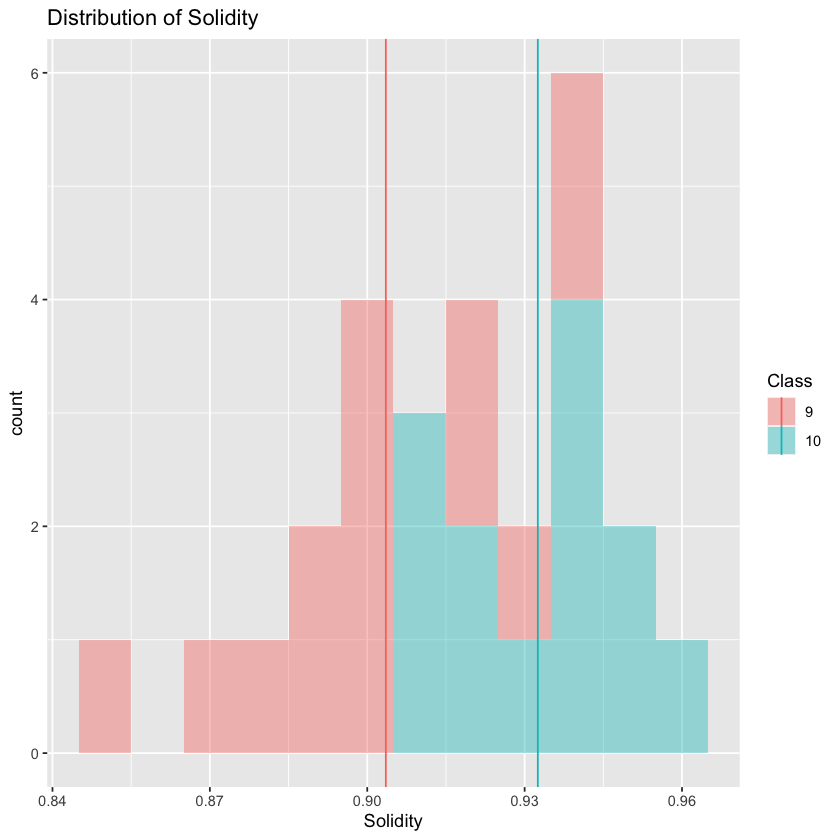

In [7]:
solidity_dist

<figcaption align = "center">Figure 2.1.1 - Sample distribution of Solidity for Class 9 and 10 </figcaption>
</p>

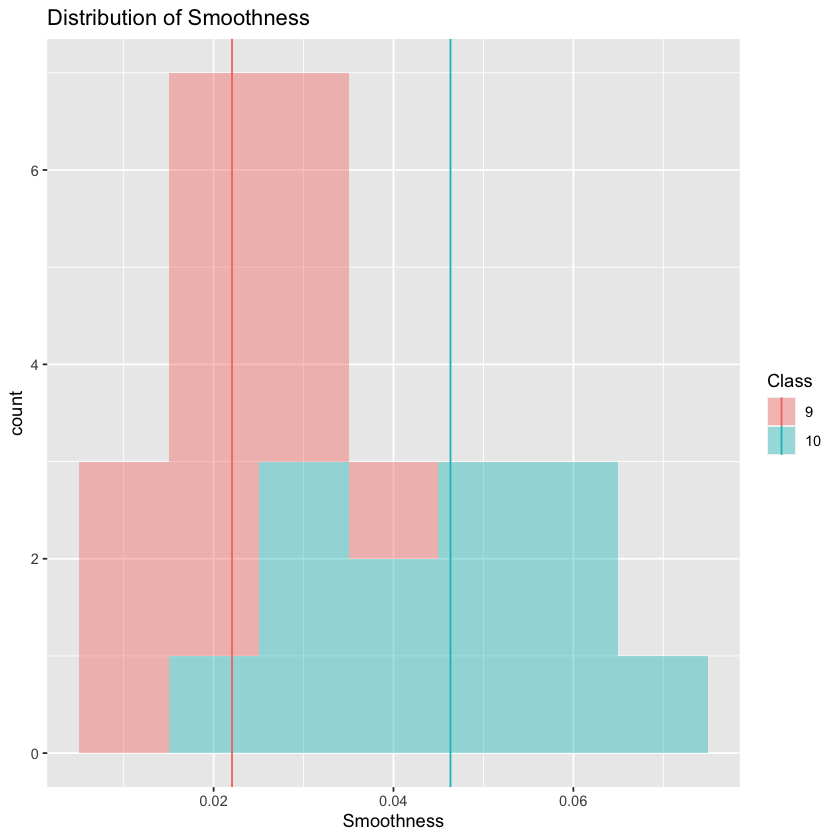

In [8]:
smoothness_dist

<figcaption align = "center">Figure 2.1.2 - Sample distribution of Smoothness for Class 9 and 10 </figcaption>
</p>

### 2.2 Methods

Now, let's test our expected preliminary findings, tomentosa (class 10) is smoother and more solid than Betula pubescens (class 9), thus we are only concerned about the one-sided hypothesis test. The **hypothesis** are as follow: (Set the significant level for all the hypothesis testing: 0.05, and we need to find 90% CI for each distribution)
-  $H_{10}$: the mean solidity of Tilia tomentosa (class 10) is same as Betula pubescens (class 9).
-  $H_{1A}$: the mean solidity of Tilia tomentosa (class 10) is greater Betula pubescens (class 9).

-  $H_{20}$: the mean smoothness of Tilia tomentosa (class 10) is same as Betula pubescens (class 9).
-  $H_{2A}$: the mean smoothness of Tilia tomentosa (class 10) is greater Betula pubescens (class 9).



According to the preliminary result, bootstrapping is more appropriate than asymptotics. Since the sample size of the 2 classes we are interested in are 14 and 13 respectively which are not large enough for us to find the specific numerical patterns and get a convincing result. The two variances of the data are large, which may lead to  less preciseness of the outcome. In order to improve the precision of our findings with the limited observations, we are going to conduct an enhanced experimental analysis by bootstrap to derive its corresponding dataset with more referable size.

However, the asymptotic method highly dependes on CLT while our dataset can’t satisfy the condition of  applying CLT due to limited sample size. At the same time the pattern of normal distribution can not be found from the sample data, it cannot be concluded that the population data is normally distributed. Therefore, the asymptotic method doesn’t work for the dataset we are interested in.

To compared the distribution, we select the mean as the variable of interest. With such method, we further conduct our analysis as follow.

#### First, the observed mean difference between the two groups of leaves in terms of solidity and smoothness are found respectively.

Second, the sample statistics within each bootstrapped sample is derived in order to generate the bootstrap sampling distribution.

Third, by plugging the observed statistics into the models separately, the p-value can be calculated with a right tail test at the significant level of 0.05. Also, we find the corresponding 90% confidence interval to interpret our findings in different ways. 

Finally, with such numerical features detected previously, we visualize the results and make the conclusion accordingly. 

#### Test Statictics

First, the observed mean differences between the two groups of leaves in terms of solidity and smoothness are found respectively.

In [9]:
solidity_mean_diff  <- leaf %>% 
    specify(formula = Solidity ~ Class) %>% 
    calculate(stat = "diff in means", order = c("10", "9"))

smoothness_mean_diff  <- leaf %>% 
    specify(formula = Smoothness ~ Class) %>% 
    calculate(stat = "diff in means", order = c("10", "9"))

Dropping unused factor levels c("1", "2", "3", "4", "5", "6", "7", "8", "11", "12", "13", "14", "15", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36") from the supplied explanatory variable 'Class'.

Dropping unused factor levels c("1", "2", "3", "4", "5", "6", "7", "8", "11", "12", "13", "14", "15", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36") from the supplied explanatory variable 'Class'.



The difference in means of **solidity** between the two groups of leaves is:

In [10]:
solidity_mean_diff$stat[1]

[1] 0.02897093

The difference in means of **smoothness** between the two groups of leaves is:

In [11]:
smoothness_mean_diff$stat[1]

[1] 0.0242918

#### Bootstrap sampling distribution
Second, the sample statistics within each bootstrapped sample is derived in order to generate the bootstrap sampling distribution.

In [12]:
set.seed(1234)

bootstrap_solidity <- 
     leaf %>% 
     specify(formula = Solidity ~ Class) %>% 
     hypothesize(null = "independence") %>% 
     generate(type = "permute", reps = 10000) %>% 
     calculate(stat = "diff in means", order = c("10", "9"))

bootstrap_smoothness <- 
     leaf %>% 
     specify(formula = Smoothness ~ Class) %>% 
     hypothesize(null = "independence") %>% 
     generate(type = "permute", reps = 10000) %>% 
     calculate(stat = "diff in means", order = c("10", "9"))

Dropping unused factor levels c("1", "2", "3", "4", "5", "6", "7", "8", "11", "12", "13", "14", "15", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36") from the supplied explanatory variable 'Class'.

Dropping unused factor levels c("1", "2", "3", "4", "5", "6", "7", "8", "11", "12", "13", "14", "15", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36") from the supplied explanatory variable 'Class'.



In [13]:
head(bootstrap_solidity)

replicate,stat
<int>,<dbl>
1,0.0097860989
2,0.0001506593
3,-0.0069509341
4,0.0029574725
5,0.0045967582
6,-0.0257114835


<figcaption align = "center">Table 2.2.1 - first 6 rows of bootstrap sampling distribution of solidity</figcaption>

In [14]:
head(bootstrap_smoothness)

replicate,stat
<int>,<dbl>
1,-0.003810302
2,-0.008306247
3,-0.004543011
4,0.009275945
5,0.002686313
6,-0.006699747


<figcaption align = "center">Table 2.2.2 - first 6 rows of bootstrap sampling distribution of smoothness</figcaption>

#### P-value and confidence intervals
Third, by plugging the observed statistics into the models separately, the p-value can be calculated with a right tail test at the significant level of 0.05.

In [15]:
p_value_solidity = bootstrap_solidity %>% get_p_value(obs_stat = solidity_mean_diff, direction = "right")
p_value_smoothness = bootstrap_solidity %>% get_p_value(obs_stat = smoothness_mean_diff, direction = "right")

shade_pva_solidity <- 
bootstrap_solidity %>%
visualize() +
shade_p_value(solidity_mean_diff, direction = "right")+
labs(x = "difference in mean of solidity")

shade_pva_smoothness <-
bootstrap_smoothness%>%
visualize() +
shade_p_value(smoothness_mean_diff, direction = "right")+
labs(x = "difference in mean of smoothness")

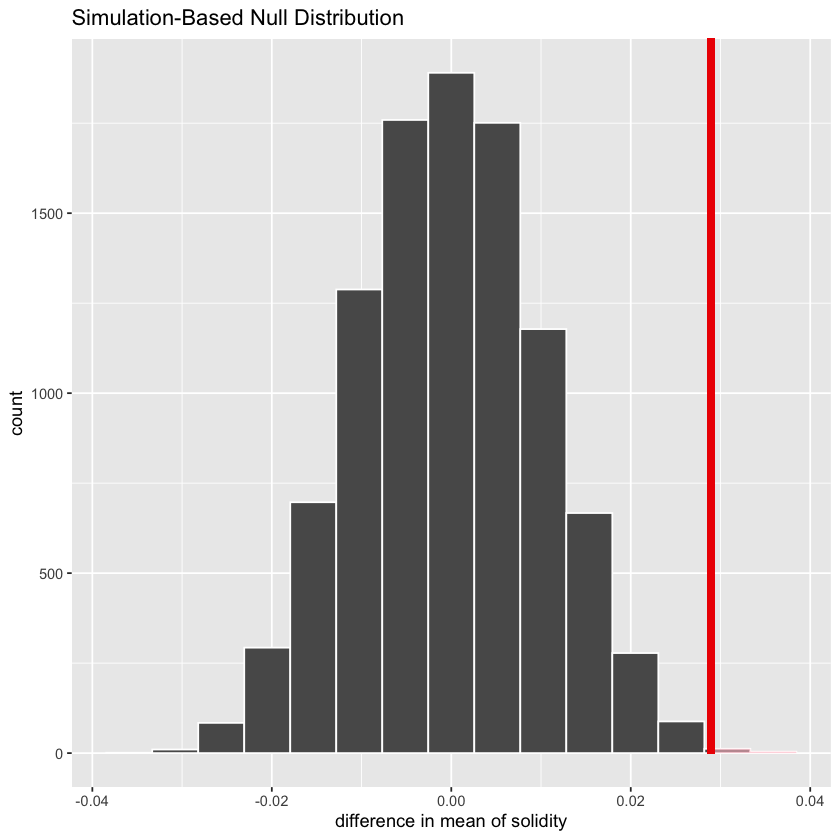

In [16]:
shade_pva_solidity

<figcaption align = "center">Figure 2.2.1 - Bootstrap sampling distribution of difference of means of solidity with shaded p-value</figcaption>

The p-value of difference in means of **solidity** is

In [17]:
p_value_solidity$p_value[1]

[1] 0.0012

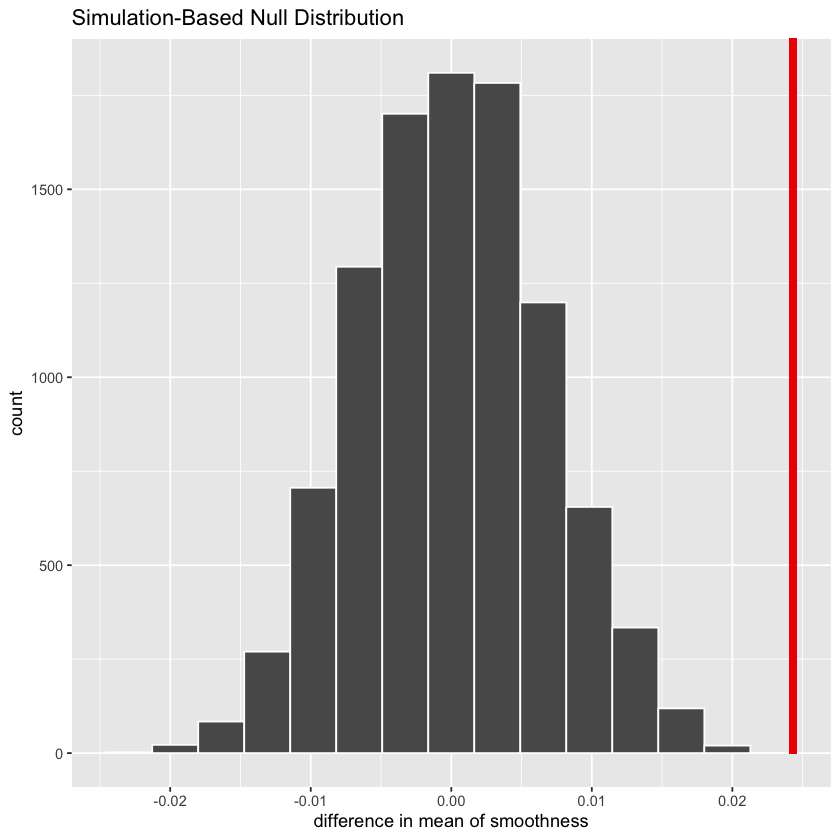

In [18]:
shade_pva_smoothness

<figcaption align = "center">Figure 2.2.2 - Bootstrap sampling distribution of difference of means of solidity with shaded p-value</figcaption>

The p-value of difference in means of **smoothness** is

In [19]:
p_value_smoothness$p_value[1]

[1] 0.0078

We observes that **both p-values are less than 0.01**. The shaded areas of both plots are really small, indicating that it is significant enough to reject the null hypotheses. 

Also, we find the corresponding 90% confidence interval to interpret our findings in different ways. 

In [20]:
solidity_ci_0.9 <- bootstrap_solidity%>%
get_confidence_interval(level = 0.9)

smoothness_ci_0.9 <- bootstrap_smoothness%>%
get_confidence_interval(level = 0.9)

In [21]:
solidity_ci_0.9

lower_ci,upper_ci
<dbl>,<dbl>
-0.01681728,0.01679126


<figcaption align = "center">Table 2.2.3 - Upper and lower bounds of 90% confidence interval of difference in mean of solidity</figcaption>

In [22]:
smoothness_ci_0.9

lower_ci,upper_ci
<dbl>,<dbl>
-0.01068777,0.0112059


<figcaption align = "center">Table 2.2.4 - Upper and lower bounds of 90% confidence interval of difference in mean of smoothness</figcaption>

In [23]:
shade_ci_solidity <- 
bootstrap_solidity %>%
visualize() +
shade_confidence_interval(endpoints = solidity_ci_0.9) +
labs(x = "difference in mean of solidity")

shade_ci_smoothness <-
bootstrap_smoothness%>%
visualize() +
shade_confidence_interval(endpoints = smoothness_ci_0.9)+
labs(x = "difference in mean of smoothness")

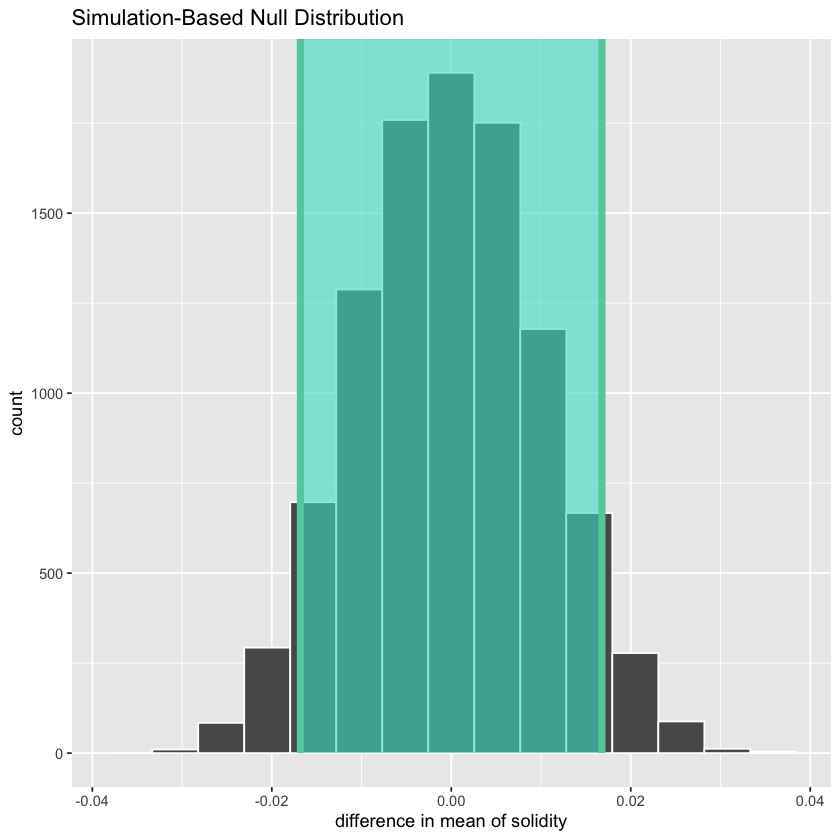

In [24]:
shade_ci_solidity

<figcaption align = "center">Figure 2.2.3 - Bootstrap sampling distribution of difference of means of solidity with shaded 90% confidence interval</figcaption>

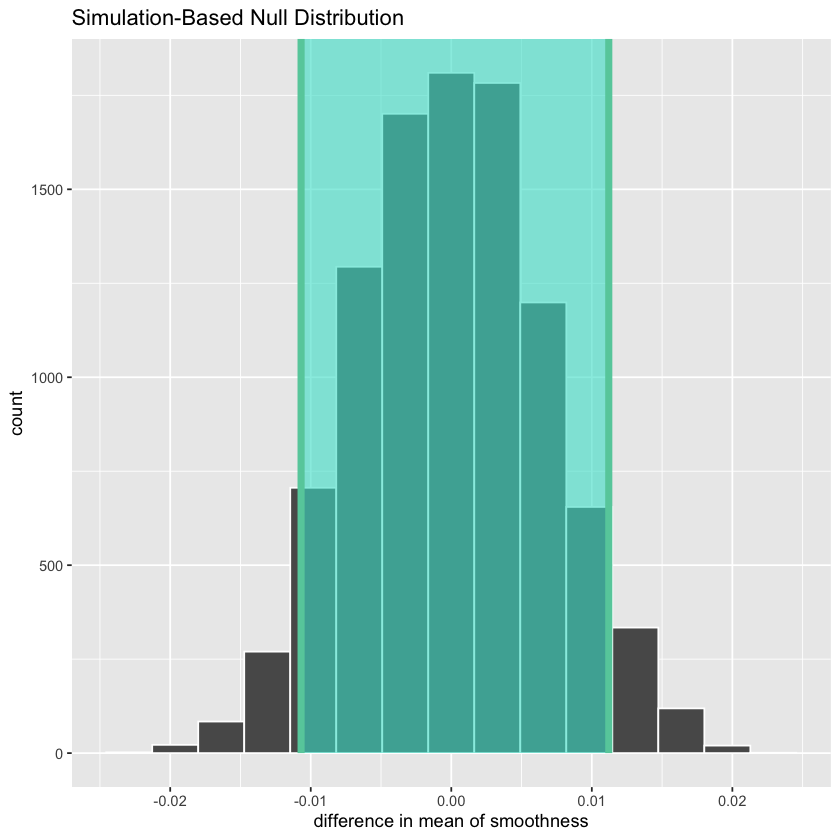

In [25]:
shade_ci_smoothness

<figcaption align = "center">Figure 2.2.4 - Bootstrap sampling distribution of difference of means of smoothness with shaded 90% confidence interval</figcaption>

- We are 90% confident that the interval $[-0.01681728,0.01679126]$ contains the population difference of means of **solidity** of leaves of class 9 and 10.
- We are 90% confident that the interval $[-0.01068777,0.0112059]$ contains the population difference of means of **smoothness** of leaves of class 9 and 10.

## 3. **Discussion**

### 3.1 **Summary**

Since both of the p-values for the two hypothesis tests are too small under the significant level of $\alpha$ = 0.05 we refer to, we have enough evidence to reject $H_{10}$ and $H_{20}$ and conclude that a) the mean solidity of Tilia tomentosa (class 10) is greater Betula pubescens (class 9) and b) the mean smoothness of Tilia tomentosa (class 10) is greater Betula pubescens (class 9).

On the other hand, we have 90% confidence to say the population difference of mean of solidity between Tilia tomentosa and Betula pubescens is within the interval of $(-0.01681728, 0.01679126)$, and the the population difference of mean of smoothness between Tilia tomentosa and Betula pubescens is within the interval of $(-0.01068777, 0.0112059)$.

What have been found is highly corresponding to the preliminary result in the previous section and thus, it is not surprising to get this conclusion. The reason for this could be related to the difference of the growth environment. Betula pubescens is originally from northern Europe, Iceland, North Asia and Greenland which generally have colder temperature all year around. However, Tilia tomentosa is native to Southeast Europe and southwest Asia where the weather is relatively milder. In order to adjust to their own geographical features respectively, the leaves of Tilia tomentosa has been more smooth and solid along with its evolution, while vise verse to Betula pubescens. Besides, the differences between the growth environments led by the latitudes can also accelerate their evolution into different directions, such as rain v.s. snow and hyperoxia v.s. hypoxia, etc.

### 3.2 **About trustworthy**

Since we have resampled for many times which eliminates the variance, the precision of the findings should be higher than directly plotting the observation using the limited data. And we set the significance level $\alpha$ = 0.05 in case of rejecting the null hypothesis while it is true

### 3.3 **Further questions**
It is not surprising to find out the the indexes of both smoothness and solidity of Tilia tomentosa (class 10) exceed Betula pubescens simultaneously. However, what is worth exploring more is, is there any specific relationship between smoothness and solidity. Are there any evidence showing that smoothness can lead to solidity, or vise versa? The answer to these questions may address our findings in a more general way and provide our study with higher value.

## 4. **References**

1. "Evaluation of Features for Leaf Discrimination”, Pedro F. B. Silva, Andre R.S. Marcal,
Rubim M. Almeida da Silva (2013), Springer Lecture Notes in Computer Science, Vol.
7950, 197-204.

2. “Development of a System for Automatic Plant Species Recognition”, Pedro Filipe Silva,
Disserta ̧c ̃ao de Mestrado (Master’s Thesis), Faculdade de Ciˆencias da Universidade do
Porto. Available for download or online reading at http://hdl.handle.net/10216/67734


In [26]:
t_test_solidity <- tidy(
    t.test(
        x = leaf %>% filter(Class==10) %>% pull(Solidity),
        y = leaf %>% filter(Class==9) %>% pull(Solidity),
        alternative = 'greater'
    )
)
t_test_solidity

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.02897093,0.9325131,0.9035421,3.46483,0.001049488,23.01543,0.01464092,Inf,Welch Two Sample t-test,greater


In [27]:
t_test_smoothness <- tidy(
    t.test(
        x = leaf %>% filter(Class==10) %>% pull(Smoothness),
        y = leaf %>% filter(Class==9) %>% pull(Smoothness),
        alternative = 'greater'
    )
)
t_test_smoothness

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.0242918,0.04633923,0.02204743,5.108611,3.660258e-05,18.01877,0.01604667,Inf,Welch Two Sample t-test,greater


From our Solidity t test result, we gained a p-value of 0.001049488, which is smaller than our $\alpha$ value. Therefore, we reject the null hypothesis and conclude that the mean solidity of Tilia tomentosa (class 10) is greater Betula pubescens (class 9).

From our Smoothness t test result, we gained a p-value of 3.660258e-05, which is smaller than our $\alpha$ value. Therefore, we reject the null hypothesis and conclude that the mean smoothness of Tilia tomentosa (class 10) is greater Betula pubescens (class 9).